In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pizza_df=pd.read_csv('pizza_sales.csv')

In [4]:
pizza_df

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Total Sales by Category:
 pizza_category
Chicken    195919.50
Classic    220053.10
Supreme    208197.00
Veggie     193690.45
Name: total_price, dtype: float64


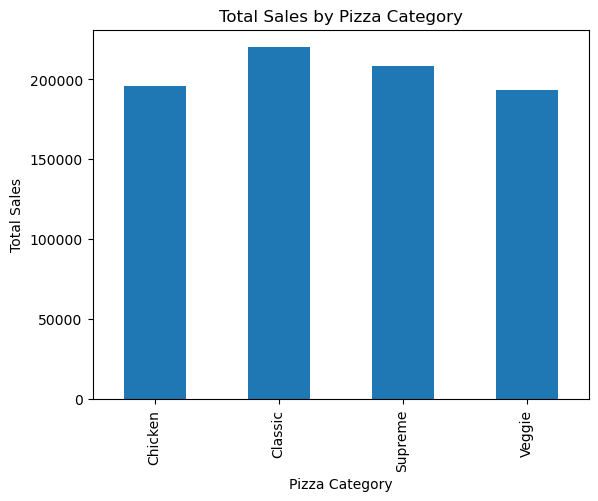

In [5]:
# 1. Total Sales by Pizza Category
sales_by_category = pizza_df.groupby('pizza_category')['total_price'].sum()
print("Total Sales by Category:\n", sales_by_category)
sales_by_category.plot(kind='bar', title='Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.show()



Number of Pizzas Sold by Category:
 pizza_category
Chicken    10815
Classic    14579
Supreme    11777
Veggie     11449
dtype: int64


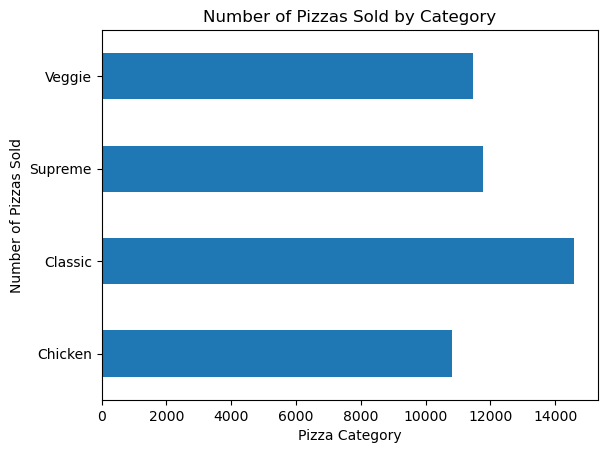

In [6]:
# 2. Number of Pizzas Sold by Category (assuming each row is one pizza)
quantity_by_category = pizza_df.groupby('pizza_category').size() # or .count() if order_id is unique per pizza
print("\nNumber of Pizzas Sold by Category:\n", quantity_by_category)
quantity_by_category.plot(kind='barh', title='Number of Pizzas Sold by Category')
plt.xlabel('Pizza Category')
plt.ylabel('Number of Pizzas Sold')
plt.show()



Average Order Value by Category:
 pizza_category
Chicken    22.952144
Classic    20.264582
Supreme    22.916566
Veggie     21.663175
Name: average_order_value, dtype: float64


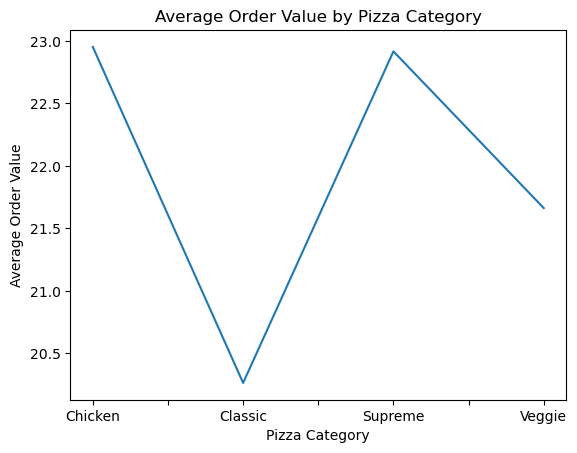

In [7]:
# 3. Average Order Value by Category (assuming 'order_id' exists)
order_value_by_category = pizza_df.groupby('pizza_category').agg(
    total_sales=('total_price', 'sum'),
    order_count=('order_id', 'nunique') # Count unique order IDs
)
order_value_by_category['average_order_value'] = order_value_by_category['total_sales'] / order_value_by_category['order_count']
print("\nAverage Order Value by Category:\n", order_value_by_category['average_order_value'])
order_value_by_category['average_order_value'].plot(kind='line', title='Average Order Value by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Average Order Value')
plt.show()



Distribution of Order Sizes:
 quantity
1    47693
2      903
3       21
4        3
Name: count, dtype: int64


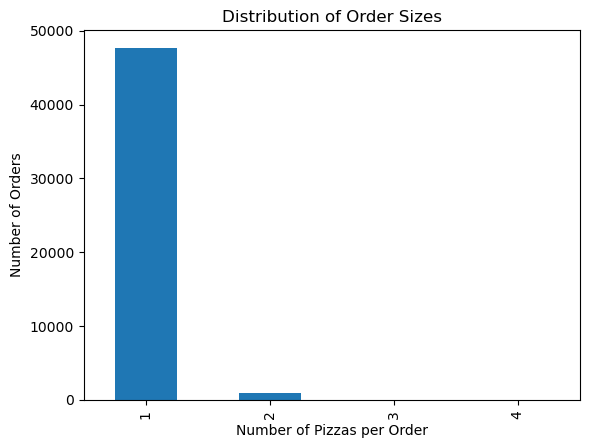

In [8]:
# 4. Distribution of Order Sizes (assuming a 'quantity' column exists)
if 'quantity' in pizza_df.columns:
    order_size_distribution = pizza_df['quantity'].value_counts().sort_index()
    print("\nDistribution of Order Sizes:\n", order_size_distribution)
    order_size_distribution.plot(kind='bar', title='Distribution of Order Sizes')
    plt.xlabel('Number of Pizzas per Order')
    plt.ylabel('Number of Orders')
    plt.show()



Percentage of Sales by Pizza Size:
 pizza_size
L      45.890333
M      30.492044
S      21.773468
XL      1.721077
XXL     0.123077
Name: total_price, dtype: float64


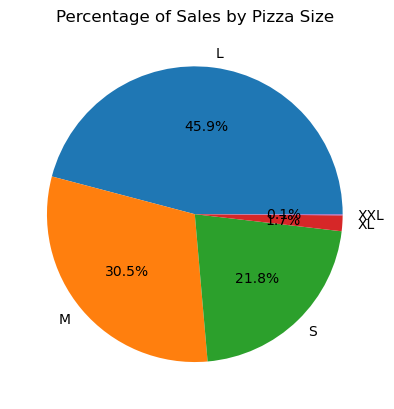

In [9]:
# 5. Percentage of Sales by Pizza Size
sales_by_size = pizza_df.groupby('pizza_size')['total_price'].sum()
total_sales = sales_by_size.sum()
percentage_sales_by_size = (sales_by_size / total_sales) * 100
print("\nPercentage of Sales by Pizza Size:\n", percentage_sales_by_size)
percentage_sales_by_size.plot(kind='pie', autopct='%1.1f%%', title='Percentage of Sales by Pizza Size')
plt.ylabel('') # To remove the default 'total_price' label
plt.show()



Top Selling Pizzas (by Revenue):
 pizza_name
The Big Meat Pizza                  2181792.00
The California Chicken Pizza        1701109.00
The Barbecue Chicken Pizza           747908.00
The Thai Chicken Pizza               448879.75
The Classic Deluxe Pizza             443826.50
The Sicilian Pizza                   435020.00
The Spicy Italian Pizza              405602.25
The Five Cheese Pizza                372941.50
The Hawaiian Pizza                   312819.25
The Prosciutto and Arugula Pizza     280159.75
Name: total_price, dtype: float64


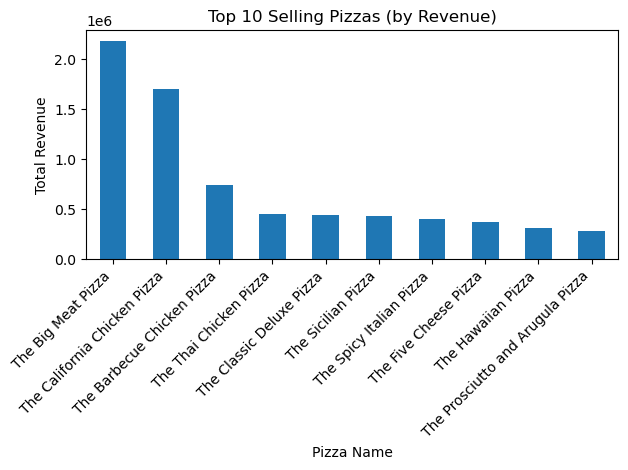

In [56]:
# 6. Top Selling Pizzas (by total revenue)
top_selling_pizzas = pizza_df.groupby('pizza_name')['total_price'].sum().sort_values(ascending=False).head(10)
print("\nTop Selling Pizzas (by Revenue):\n", top_selling_pizzas)
top_selling_pizzas.plot(kind='bar', title='Top 10 Selling Pizzas (by Revenue)')
plt.xlabel('Pizza Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()